<a href="https://colab.research.google.com/github/Sejalmali/codesoft/blob/main/Movie_genre_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
%matplotlib inline
import itertools
import seaborn as sns

# from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.text import FreqDistVisualizer
from mlxtend.feature_selection import ColumnSelector

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Movie_Genre_Dataset/train_data.txt', sep=":::", header=None, engine='python')

In [ ]:
data.columns=['id','Name','Genre','Plot']

In [ ]:
data.head(5)

,id,Name,Genre,Plot
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


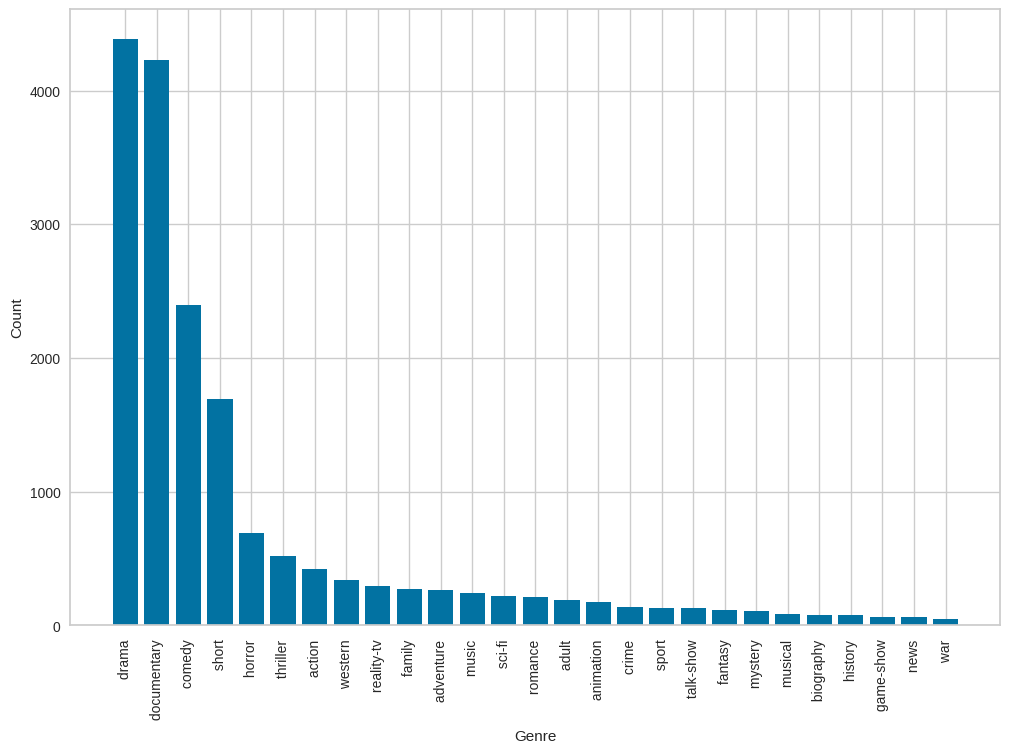

In [ ]:
plt.figure(figsize=(12, 8))
counts = data['Genre'].value_counts()
plt.bar(counts.index, counts)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
counts.index

Index([' drama ', ' documentary ', ' comedy ', ' short ', ' horror ',
       ' thriller ', ' action ', ' western ', ' reality-tv ', ' family ',
       ' adventure ', ' music ', ' sci-fi ', ' romance ', ' adult ',
       ' animation ', ' crime ', ' sport ', ' talk-show ', ' fantasy ',
       ' mystery ', ' musical ', ' biography ', ' history ', ' game-show ',
       ' news ', ' war '],
      dtype='object')

In [ ]:
allowed_genres = [' drama ', ' documentary ', ' comedy ', ' short ', ' horror ',
       ' thriller ']
filtered_df = data[data['Genre'].isin(allowed_genres)]

In [ ]:
filtered_df.head(5)

,id,Name,Genre,Plot
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
5,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


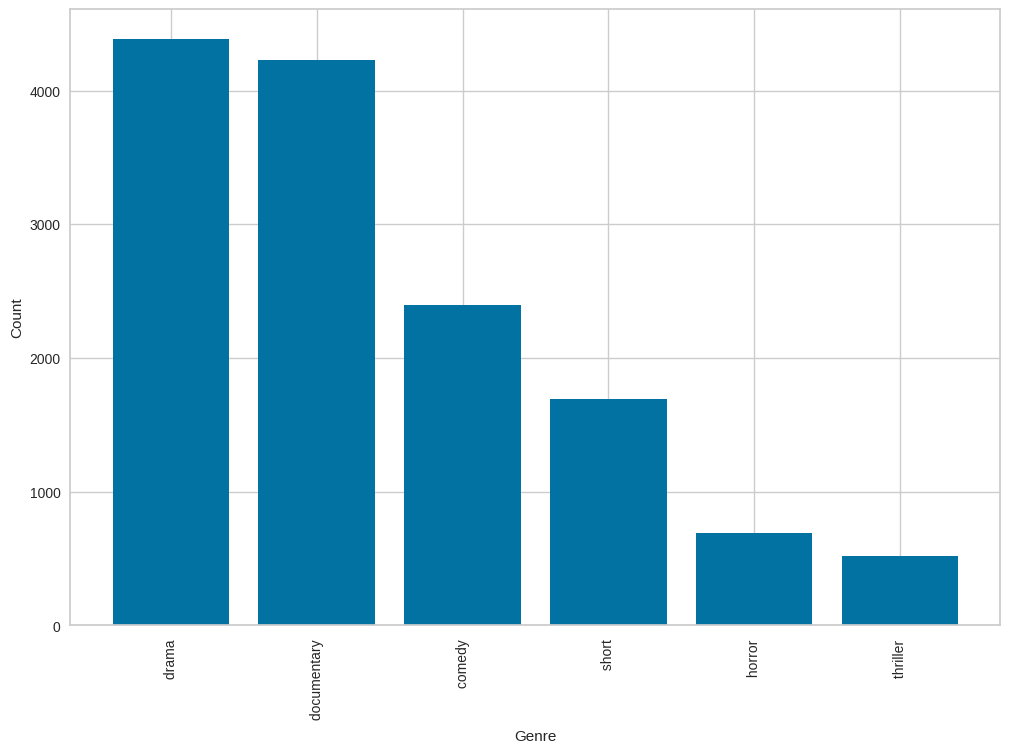

In [ ]:
plt.figure(figsize=(12, 8))
new_counts = filtered_df['Genre'].value_counts()
plt.bar(new_counts.index, new_counts)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
filtered_df['Genre'].map(lambda x:str.strip(x))

0              drama
1           thriller
3              drama
4              drama
5        documentary
            ...     
17545    documentary
17546          short
17549          drama
17550          drama
17551         comedy
Name: Genre, Length: 13920, dtype: object

**Applying NLP**

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
en_stopwords = stopwords.words('english')
en_stopwords+=['one', 'two', 'go','goes', 'get', 'also', 'however', 'tells',''''s''']
en_stopwords += list(string.punctuation)

# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
def clean_text(text):
    text=text.lower()   #Lowercasing all text
    text=word_tokenize(text)  #Tokenization
    text=[w for w in text if w not in en_stopwords]  #Stopwords Filtering
    text = [lemmatizer.lemmatize(w) for w in text]
    text=' '.join(text)  #Reform sentence
    return text

In [ ]:
sample_text=filtered_df['Plot'][3]
sample_text

" To help their unemployed father make ends meet, Edith and her twin sister Grace work as seamstresses . An invalid, Grace falls prey to the temptations of Chinatown opium and becomes an addict, a condition worsened by a misguided physician who prescribes morphine to ease her pain. When their father strikes oil, the family enjoys a new prosperity and the sisters meet the eligible Jack Herron, a fellow oil prospector. To Grace's shock, Jack falls in love with Edith and in her jealousy, Grace tells Jack that Edith, not she, has a drug problem. Hinting that her sister will soon need more morphine, Grace arranges for a dinner in Chinatown with the couple. While her sister and Jack dance, Grace slips away to an opium den. Edith follows her, but ends up in the wrong den and is arrested in an ensuing drug raid. After he bails her out of jail, Edith takes an angry Jack to search for Grace and stumbles across her half-conscious body lying in the street. The truth about the sisters is revealed, 

In [ ]:
clean_text(sample_text)

'help unemployed father make end meet edith twin sister grace work seamstress invalid grace fall prey temptation chinatown opium becomes addict condition worsened misguided physician prescribes morphine ease pain father strike oil family enjoys new prosperity sister meet eligible jack herron fellow oil prospector grace shock jack fall love edith jealousy grace jack edith drug problem hinting sister soon need morphine grace arranges dinner chinatown couple sister jack dance grace slip away opium den edith follows end wrong den arrested ensuing drug raid bail jail edith take angry jack search grace stumble across half-conscious body lying street truth sister revealed sending grace sanitarium country jack edith married'

In [ ]:
filtered_df['Plot'].map(lambda x:clean_text(x))

0        listening conversation doctor parent 10-year-o...
1        brother sister past incestuous relationship cu...
3        help unemployed father make end meet edith twi...
4        film title refers un-recovered body ground zer...
5        quality control consists series 16mm single ta...
                               ...                        
17545    arlington history four part series chronicling...
17546    series time lapse intertwine reveal city bustl...
17549    anniversary tragic accident four adult reunite...
17550    josutty son joseph shoshamma belongs middle cl...
17551                                             good-nat
Name: Plot, Length: 13920, dtype: object

**Splitting Text**

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(filtered_df['Plot'].values,filtered_df['Genre'].values,test_size=0.25,random_state=123,stratify=filtered_df['Genre'].values)

**Count Vactorizer**

In [ ]:
countvec = CountVectorizer(ngram_range = (1,3), max_features = 30000)
vec_Xtr = countvec.fit_transform(X_train)

**TF-IDF Vectorizer**

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)

tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

**1. Dummy Grid Classifier**

In [ ]:
dummy_grid = {
    'strategy': ['most_frequent', 'stratified', 'prior', 'uniform']
}
dummy = DummyClassifier( random_state = 42)
dummy_gs = GridSearchCV(dummy, param_grid = dummy_grid, cv = 5)
dummy_gs.fit(X_train, y_train)
print(dummy_gs.best_score_)

0.3153256704980843


**2. Grid Search with Multinomial Naive Bayes**

In [ ]:
model_resultstfidf = {}
mnb = MultinomialNB()

mnb.fit(tfidf_train_vectors,y_train)

MultinomialNB()

In [ ]:
y_pred = mnb.predict(tfidf_test_vectors)

In [ ]:
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.5474137931034483
F1 Score: 0.6672478792069958


In [ ]:
model_resultstfidf = {}
mnb_grid = {
    'alpha': [0, 0.2, 0.5, 0.8, 1.0, 1.0],
    'fit_prior' : [True, False],
    'class_prior' : [None, [.4, .3, 0.08, .07, .06, .06], [.167, .167, .167, .167, .167, .167]]
}
mnb = MultinomialNB()
mnb_tfidf_gs = GridSearchCV(mnb, param_grid = mnb_grid, cv = 5)
mnb_tfidf_gs.fit(tfidf_train_vectors, y_train)
print(mnb_tfidf_gs.best_score_)

model_resultstfidf['Multinomial Bayes']= mnb_tfidf_gs.best_score_

**3 Grid Search with Logistic Regression(TF_IDF)**

In [ ]:
lr_grid = {
    'penalty' : ['l1', 'l2', 'none'],
    'C' : [1.0, 1e2, 1e4, 1e10],
    'class_weight' : ['balanced', None],
    'solver' : ['lbfgs', 'liblinear'],
    'multi_class' : ['ovr', 'multinomial']
}
logreg = LogisticRegression(max_iter=1000,random_state = 42)

logreg_tfidf_gs = GridSearchCV(logreg, param_grid = lr_grid, cv = 5)
logreg_tfidf_gs.fit(tfidf_train_vectors, y_train)
print(logreg_tfidf_gs.best_score_)
model_resultstfidf['Logistic Regression'] = logreg_tfidf_gs.best_score_

**3. Grid Search with Decision Tree (Count_Vector)**

In [ ]:
model_results_cvec = {}
grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10],
    'min_samples_split': [1, 5, 10, 20]
}

dt_clf = DecisionTreeClassifier (random_state = 42)
gs_cvec_tree = GridSearchCV(dt_clf, param_grid = grid, cv = 5)
gs_cvec_tree.fit(vec_Xtr, y_train)

print(gs_cvec_tree.best_score_)
model_results_cvec['Decision Tree'] = gs_cvec_tree.best_score_

**4. SGD Classifier (count_vectorizer)**

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
grid = {
    'loss' : ['hinge', 'log'],
    'penalty' : ['l2', 'l1'],
    'alpha' : [1e-3, 1e-4, 1e-5],
    'max_iter' : [10, 15, 20],
    'class_weight' : ['balanced', None]
}
sgd = SGDClassifier(random_state=42)
sgd_cvec_gs = GridSearchCV(sgd, param_grid = grid, cv=5)
sgd_cvec_gs.fit(vec_Xtr, y_train)

print(sgd_cvec_gs.best_score_)
model_results_cvec['SGD'] = sgd_cvec_gs.best_score_

**5. SGD Classifier (tfidf-transformed)**

In [ ]:
grid = {
    'loss' : ['hinge', 'log'],
    'penalty' : ['l2', 'l1'],
    'alpha' : [1e-3, 1e-4, 1e-5],
    'max_iter' : [20, 25, 30],
    'class_weight' : ['balanced', None]
}
sgd = SGDClassifier(random_state=42)
sgd_tfidf_gs = GridSearchCV(sgd, param_grid = grid, cv=5)
sgd_tfidf_gs.fit(tfidf_train_vectors, y_train)

print(sgd_tfidf_gs.best_score_)
model_resultstfidf['SGD'] = sgd_tfidf_gs.best_score_

**6. Grid Search with Multinomial Naive Bayes (Count_Vec)**

In [ ]:
mnb_grid = {
    'alpha': [0, 0.2, 0.5, 0.8, 1.0],
    'fit_prior' : [True, False],
    'class_prior' : [None, [.4, .3, 0.08, .07, .06, .06], [.167, .167, .167, .167, .167, .167]]
}
mnb = MultinomialNB()
mnb_cvec_gs = GridSearchCV(mnb, param_grid = mnb_grid, cv = 5)
mnb_cvec_gs.fit(vec_Xtr, y_train)
print(mnb_cvec_gs.best_score_)
model_results_cvec['Multinomial Bayes'] = mnb_cvec_gs.best_score_

**3. Grid Search with Decision Tree (TF_IDF)**

In [ ]:
grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10],
    'min_samples_split': [1, 5, 10, 20]
}

dt_clf = DecisionTreeClassifier (random_state = 42)
gs_tfidf_tree = GridSearchCV(dt_clf, param_grid = grid, cv = 5)
gs_tfidf_tree.fit(tfidf_train_vectors, y_train)

print(gs_tfidf_tree.best_score_)
model_resultstfidf['Decision Tree'] = gs_tfidf_tree.best_score_

In [ ]:
model_results_cvec=sorted(model_results_cvec.items())
model_resultstfidf=sorted(model_resultstfidf.items())


In [ ]:
model_results_cvec=dict(model_results_cvec)
model_resultstfidf=dict(model_resultstfidf)

**Comparison of the Different Models and their Scores**

In [ ]:
print(model_resultstfidf)
print('\n',model_results_cvec)

{'Decision Tree': 0.5047892720306514, 'Multinomial Bayes': 0.6022030651340997, 'SGD': 0.6621647509578544}

 {'Decision Tree': 0.5087164750957853, 'Multinomial Bayes': 0.6467432950191571, 'SGD': 0.6411877394636015}


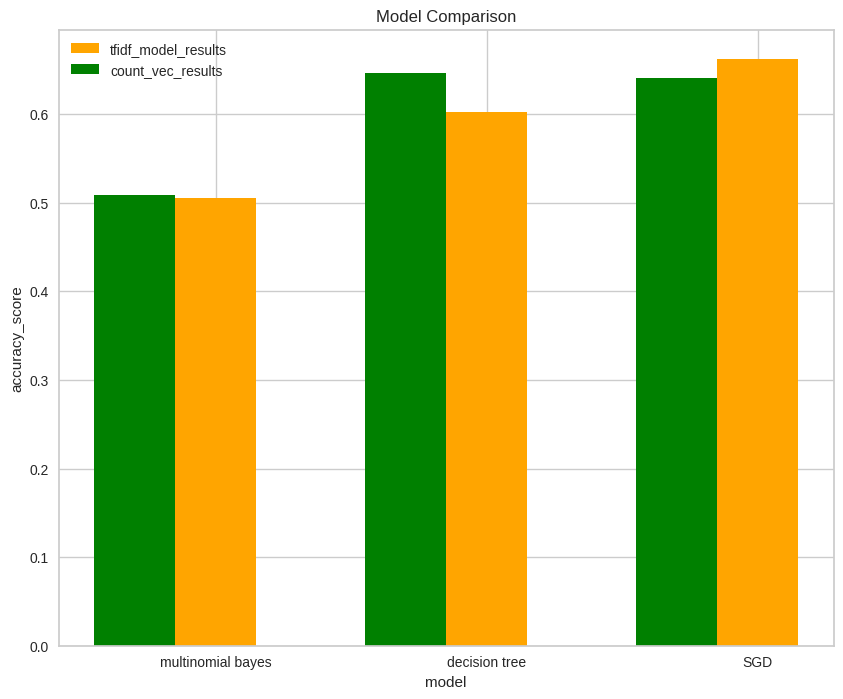

In [ ]:
import numpy as np
tfidf_model_results = pd.DataFrame(model_resultstfidf.items(), columns=['model', 'accuracy_score'])
count_vec_results = pd.DataFrame(model_results_cvec.items(), columns=['model', 'accuracy_score'])

y1 = tfidf_model_results['accuracy_score']
y2 = count_vec_results['accuracy_score']

fig, ax = plt.subplots(figsize = (10,8))
ind = np.arange(len(tfidf_model_results))

width = 0.3
plt.bar(ind, y1, width, color = 'orange')
plt.bar(ind - width, y2, width,color = 'green')

plt.title('Model Comparison')
plt.xlabel('model')
plt.ylabel('accuracy_score')
plt.xticks(np.arange(3), ['multinomial bayes','decision tree', 'SGD'])
plt.legend(['tfidf_model_results', 'count_vec_results'])